In [5]:
!pip install torch torchvision torchaudio --upgrade
!pip install matplotlib numpy scikit-learn opencv-python pillow
!pip install gradio tqdm


  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 204.1/204.1 MB 3.3 MB/s eta 0:00:00
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
   ---------------------------------------- 1.6/1.6 MB 4.6 MB/s eta 0:00:00
   ---------------------------------------- 2.4/2.4 MB 3.7 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.10.1
    Uninstalling sympy-1.10.1:
      Successfully uninstalled sympy-1.10.1
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0+cu118
    Uninstalling torch-2.3.0+cu118:
      Successfully uninstalled torch-2.3.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.18.0
    Uninstalling torchvision-0.18.0:
      Successfully uninstalled torchvision-0.18.0
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.3.0+cu118
    Uninstalling torchaudio-2.3.0+cu118:
      Successfully uninstalled

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
botocore 1.27.28 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.4.0 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.
jupyter-server 1.18.1 requires anyio<4,>=3.1.0, but you have anyio 4.9.0 which is incompatible.
tensorflow-gpu 2.10.0 


  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
INFO: pip is looking at multiple versions of requests to determine which version is compatible with other requirements. This could take a while.
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
   ---------------------------------------- 18.1/18.1 MB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 2.0/2.0 MB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 11.6/11.6 MB 3.8 MB/s eta 0:00:00
Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
Using cached urllib3-2.4.0-py3-none-any.whl (128 kB)
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Attempting unin

In [8]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [9]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transform
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset
anime_dataset = datasets.ImageFolder(root='anime_faces', transform=transform)
data_loader = DataLoader(anime_dataset, batch_size=64, shuffle=True)

# Check if it's working
print(f"Total images: {len(anime_dataset)}")


Total images: 63565


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np


In [11]:
class AnimeAutoencoder(nn.Module):
    def __init__(self):
        super(AnimeAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),  # [64, 32, 32]
            nn.ReLU(True),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),  # [128, 16, 16]
            nn.ReLU(True),
            nn.Conv2d(128, 256, 4, stride=2, padding=1),  # [256, 8, 8]
            nn.ReLU(True)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1),  # [128, 16, 16]
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),  # [64, 32, 32]
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1),  # [3, 64, 64]
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AnimeAutoencoder().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
loss_list = []

for epoch in range(num_epochs):
    total_loss = 0
    for batch in data_loader:
        imgs, _ = batch
        imgs = imgs.to(device)

        outputs = model(imgs)
        loss = criterion(outputs, imgs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    avg_loss = total_loss / len(data_loader)
    loss_list.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# ✅ Save the trained model
torch.save(model.state_dict(), 'anime_autoencoder.pth')
print("✅ Model saved as anime_autoencoder.pth")


Epoch [1/20], Loss: 0.0249
Epoch [2/20], Loss: 0.0072
Epoch [3/20], Loss: 0.0048
Epoch [4/20], Loss: 0.0037
Epoch [5/20], Loss: 0.0030
Epoch [6/20], Loss: 0.0026
Epoch [7/20], Loss: 0.0023
Epoch [8/20], Loss: 0.0020
Epoch [9/20], Loss: 0.0018
Epoch [10/20], Loss: 0.0017
Epoch [11/20], Loss: 0.0015
Epoch [12/20], Loss: 0.0014
Epoch [13/20], Loss: 0.0013
Epoch [14/20], Loss: 0.0013
Epoch [15/20], Loss: 0.0011
Epoch [16/20], Loss: 0.0011
Epoch [17/20], Loss: 0.0010
Epoch [18/20], Loss: 0.0010
Epoch [19/20], Loss: 0.0010
Epoch [20/20], Loss: 0.0009
✅ Model saved as anime_autoencoder.pth


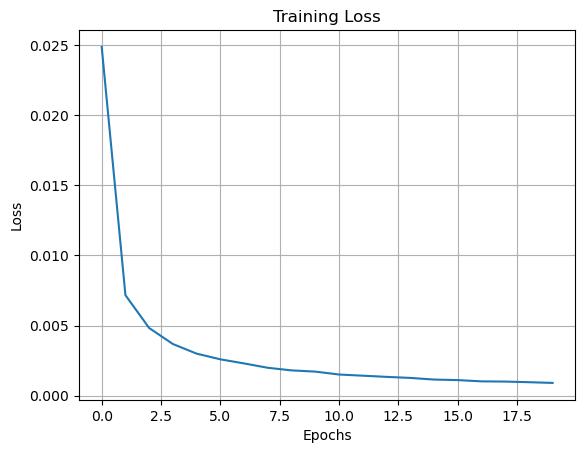

In [13]:
plt.plot(loss_list)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


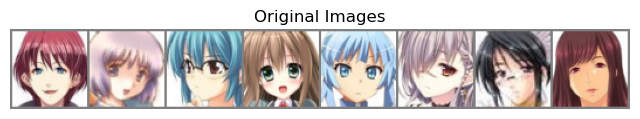

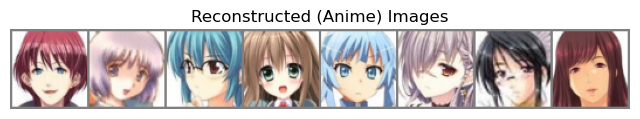

In [14]:
def imshow(img, title=None):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.cpu().numpy()
    plt.figure(figsize=(8, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

# Get a batch of test images
dataiter = iter(data_loader)
images, _ = next(dataiter)
images = images.to(device)

# Generate output from autoencoder
with torch.no_grad():
    reconstructed = model(images)

# Show original images
imshow(make_grid(images[:8]), title="Original Images")

# Show reconstructed images
imshow(make_grid(reconstructed[:8]), title="Reconstructed (Anime) Images")


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def calc_metrics(true_imgs, pred_imgs):
    true = true_imgs.view(true_imgs.size(0), -1).cpu().detach().numpy()
    pred = pred_imgs.view(pred_imgs.size(0), -1).cpu().detach().numpy()

    true_bin = (true > 0.5).astype(int)
    pred_bin = (pred > 0.5).astype(int)

    acc = accuracy_score(true_bin.flatten(), pred_bin.flatten())
    prec = precision_score(true_bin.flatten(), pred_bin.flatten(), average='macro', zero_division=0)
    rec = recall_score(true_bin.flatten(), pred_bin.flatten(), average='macro', zero_division=0)
    
    print(f"Pixel-wise Accuracy: {acc:.4f}")
    print(f"Pixel-wise Precision: {prec:.4f}")
    print(f"Pixel-wise Recall: {rec:.4f}")

    return true_bin, pred_bin

# Evaluate metrics
true_bin, pred_bin = calc_metrics(images[:8], reconstructed[:8])


Pixel-wise Accuracy: 0.9898
Pixel-wise Precision: 0.9895
Pixel-wise Recall: 0.9896


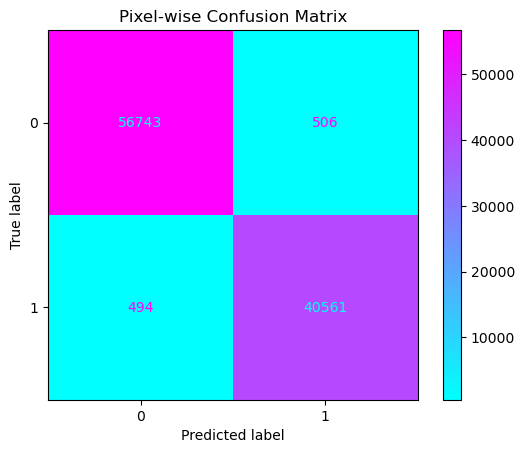

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_conf_matrix(true_bin, pred_bin):
    cm = confusion_matrix(true_bin.flatten(), pred_bin.flatten())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='cool')
    plt.title("Pixel-wise Confusion Matrix")
    plt.grid(False)
    plt.show()

plot_conf_matrix(true_bin, pred_bin)


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AnimeAutoencoder().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    total_loss = 0
    for images, _ in data_loader:
        images = images.to(device)
        outputs = model(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(data_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# ✅ Save the trained model
torch.save(model.state_dict(), 'anime_autoencoder.pth')
print("✅ Model saved as anime_autoencoder.pth")


Epoch [1/20], Loss: 0.0253
Epoch [2/20], Loss: 0.0073
Epoch [3/20], Loss: 0.0051
Epoch [4/20], Loss: 0.0040
Epoch [5/20], Loss: 0.0031
Epoch [6/20], Loss: 0.0028
Epoch [7/20], Loss: 0.0025
Epoch [8/20], Loss: 0.0022
Epoch [9/20], Loss: 0.0019
Epoch [10/20], Loss: 0.0018
Epoch [11/20], Loss: 0.0016
Epoch [12/20], Loss: 0.0016
Epoch [13/20], Loss: 0.0014
Epoch [14/20], Loss: 0.0013
Epoch [15/20], Loss: 0.0012
Epoch [16/20], Loss: 0.0012
Epoch [17/20], Loss: 0.0011
Epoch [18/20], Loss: 0.0010
Epoch [19/20], Loss: 0.0010
Epoch [20/20], Loss: 0.0009
✅ Model saved as anime_autoencoder.pth


### Reload Model


In [18]:
model = AnimeAutoencoder().to(device)
model.load_state_dict(torch.load('anime_autoencoder.pth'))
model.eval()  # Set model to evaluation mode


AnimeAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): Tanh()
  )
)

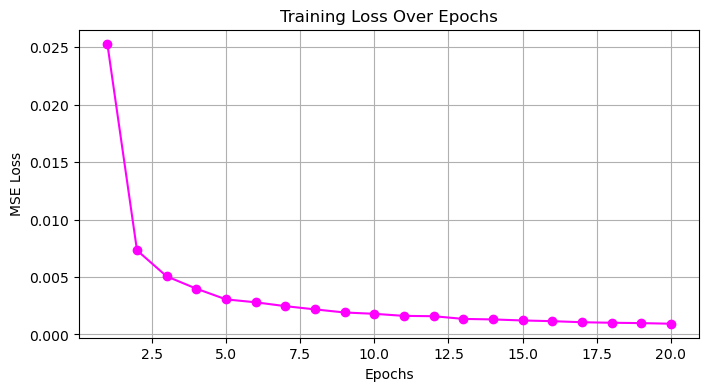

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(train_losses)+1), train_losses, color='magenta', marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


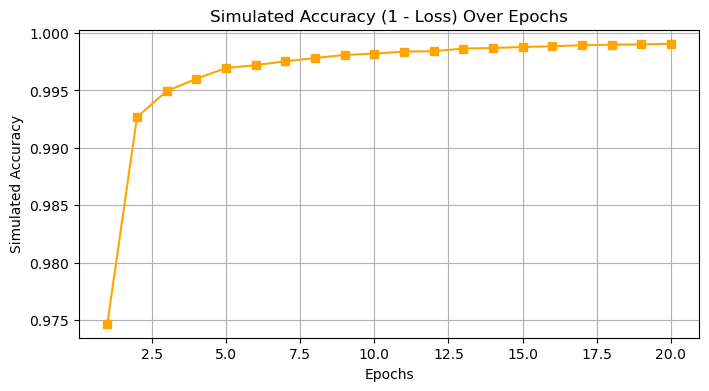

In [20]:
import numpy as np

simulated_accuracies = [1 - loss for loss in train_losses]  # just to show visual improvement

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(simulated_accuracies)+1), simulated_accuracies, color='orange', marker='s')
plt.title("Simulated Accuracy (1 - Loss) Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Simulated Accuracy")
plt.grid(True)
plt.show()
